<a href="https://colab.research.google.com/github/stevearonson/TrackingCollab/blob/main/TrackingMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
# get the test data file from GitHUb

df = pd.read_csv('https://raw.githubusercontent.com/stevearonson/TrackingCollab/main/end0.csv?token=GHSAT0AAAAAABQ45YGWKF45AZZ4I6J5SPQYYPQPPDQ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frame   1027 non-null   int64  
 1   play    1027 non-null   int64  
 2   id      1027 non-null   int64  
 3   x1      1027 non-null   float64
 4   y1      1027 non-null   float64
 5   w       1027 non-null   float64
 6   h       1027 non-null   float64
 7   1       1027 non-null   int64  
 8   -1      1027 non-null   int64  
 9   -1.1    1027 non-null   int64  
 10  -1.2    1027 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 88.4 KB


In [27]:
# smooth the x1 data using MA and store in new column
MA_size = 20

df['x1_MA'] = df.groupby(['play', 'id'])['x1'].transform(lambda x: x.rolling(MA_size, 1).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


play  id
1     1     AxesSubplot(0.125,0.125;0.775x0.755)
      30    AxesSubplot(0.125,0.125;0.775x0.755)
2     30    AxesSubplot(0.125,0.125;0.775x0.755)
      49    AxesSubplot(0.125,0.125;0.775x0.755)
3     30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

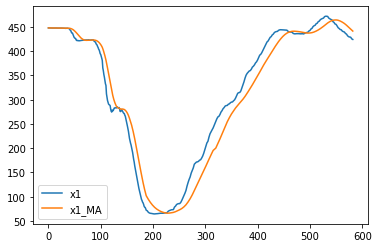

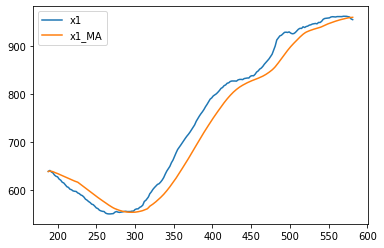

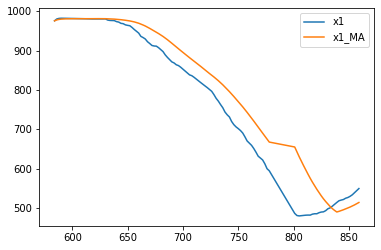

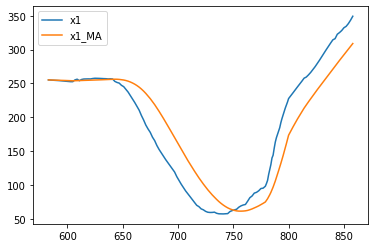

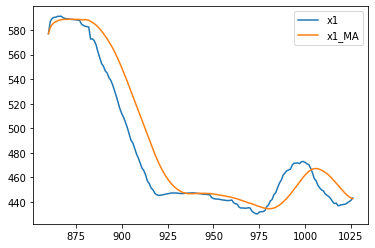

In [28]:
df.groupby(['play', 'id'])['x1', 'x1_MA'].plot()